# Introductory applied machine learning (INFR10069) 

# Lab 3: Classification models

In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
%matplotlib inline

## 1. Spam filtering and logistic regression

In [2]:
spambase = pd.read_csv('/Users/siyuyang/github/IAML-Lab-Exercises/datasets/spambase_binary.csv', delimiter = ',')
spambase.head(5)

,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [3]:
spambase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   word_freq_make_binarized        4601 non-null   int64
 1   word_freq_address_binarized     4601 non-null   int64
 2   word_freq_all_binarized         4601 non-null   int64
 3   word_freq_3d_binarized          4601 non-null   int64
 4   word_freq_our_binarized         4601 non-null   int64
 5   word_freq_over_binarized        4601 non-null   int64
 6   word_freq_remove_binarized      4601 non-null   int64
 7   word_freq_internet_binarized    4601 non-null   int64
 8   word_freq_order_binarized       4601 non-null   int64
 9   word_freq_mail_binarized        4601 non-null   int64
 10  word_freq_receive_binarized     4601 non-null   int64
 11  word_freq_will_binarized        4601 non-null   int64
 12  word_freq_people_binarized      4601 non-null   int64
 13  wor

In [4]:
X = spambase.drop(['is_spam'], axis=1)
y = spambase['is_spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=1)

In [5]:
print(y_train.value_counts())
print(y_test.value_counts())

0    2516
1    1624
Name: is_spam, dtype: int64
0    272
1    189
Name: is_spam, dtype: int64


In [6]:
# Fit a logistics regression model
lr = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9328502415458937
0.9392624728850325


From the accuracy score that we get above, the classifier indeed generalises well on unseen data.

In [7]:
# Have a look at the coefficients
coefficients = lr.coef_
coe = pd.DataFrame(data=coefficients, columns=X.columns)
print(coe.loc[0, 'word_freq_hp_binarized'], coe.loc[0, 'char_freq_$_binarized'])

-2.736142837133842 1.709948430098477


In [8]:
coefficients

array([[-0.34408205, -0.06045801, -0.34029007,  0.69877727,  1.01056593,
         0.23600526,  2.19857949,  0.77579044,  0.30770544,  0.34767542,
        -0.37749563, -0.29122597, -0.82969813,  0.59443562,  0.89007235,
         1.49564902,  0.89944899, -0.35519033,  0.15480443,  0.6552865 ,
         0.58126395,  1.00985661,  0.76384155,  1.44985761, -2.73614284,
        -0.48270894, -3.7390795 ,  1.63807846, -0.61961196, -0.04335219,
        -1.27123559, -0.74394736, -0.57373753,  0.57871863, -1.58787996,
         0.2677099 , -1.10363631,  0.97387124, -0.38193109, -0.28257636,
        -1.83221294, -2.04966323, -0.74234024, -1.25952983, -0.9110529 ,
        -1.98502859,  0.02117307, -1.49030392, -0.16099955,  0.19108202,
        -0.06379929,  1.30657283,  1.70994843, -0.30512498]])

## 2. Spam filtering and SVM

In [13]:
lsvc = LinearSVC().fit(X_train, y_train)

In [14]:
print(lsvc.score(X_train, y_train))
print(lsvc.score(X_test, y_test))

0.9323671497584541
0.9370932754880694


In [10]:
coefficients2 = lsvc.coef_
coe2 = pd.DataFrame(data=coefficients2, columns=X.columns)
print(coe2.loc[0, 'word_freq_hp_binarized'], coe2.loc[0, 'char_freq_$_binarized'])

-0.9103325550944324 0.5803286046554218


```Logistics Regression: ```
- Hypothesis function for the logistics regression:
$$ P(Y=1|\mathbf{x}) = \frac {1}{1+\text{exp}(-\mathbf{w}^T\mathbf{x})} $$
or
$$ P(Y=1|\mathbf{x}) = \frac {1}{1+\text{exp}(-\mathbf{z})} $$
if $ P > 0.5 $, then the instance should be classfied to $Y = 1$; otherwise, $Y = 0$; if $ \mathbf{z} > 0 $, then the instance should be classfied to $Y = 1$; otherwise, $Y = 0$.
- Logistics regression is a linear classifier based on its decision boundary. Its decision boundary is $\mathbf{w}^T\mathbf{x} + w_0$.

```SVM: ```
- Hypothesis function for SVM:    
$$ h(\mathbf{x}) = \text{sign}(\mathbf{w^Tx} + w_0) $$
if $h(\mathbf{x}) > 1$, then $y_i = 1$; if $h(\mathbf{x}) < -1$,, $y_i = -1$.
- The decision boundary of a SVM model is $\mathbf{w}^T\mathbf{x} + w_0$ as well.

In [11]:
# Improve the SVM model by changing the kernel function 
rbf = SVC(kernel='rbf').fit(X_train, y_train)
print(rbf.score(X_train, y_train))
print(rbf.score(X_test, y_test))

0.9557971014492753
0.9566160520607375


In [12]:
poly = SVC(kernel='poly').fit(X_train, y_train)
print(poly.score(X_train, y_train))
print(poly.score(X_test, y_test))

0.946376811594203
0.9262472885032538


## 3. DNA sequence classification and KNN
We will now look at a few ways of assessing the performance of a classifier. To do so we will introduce a new data set, the [Splice](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) data set. The classification task is to identify `intron` and `exon` boundaries on gene sequences. For more information, you can read the dataset description in the link. The class attribute can take on 3 values: `N`, `IE` and `EI`.

In [13]:
# Load Splice Train Here
splice_train = pd.read_csv('/Users/siyuyang/github/IAML-Lab-Exercises/datasets/splice_train.csv', delimiter=',')
print(splice_train.shape)
splice_train.head(10)

(2935, 61)


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,T,G,A,T,G,C,C,T,G,C,...,C,C,C,C,C,T,G,A,G,N
1,G,C,C,C,A,T,A,T,T,C,...,T,G,G,A,C,T,T,C,C,N
2,G,G,C,T,G,C,C,G,G,A,...,A,C,T,G,T,G,T,C,T,EI
3,C,T,G,C,T,G,C,T,G,G,...,G,G,C,T,G,C,T,G,G,EI
4,T,C,C,C,C,G,A,G,C,C,...,A,T,C,A,G,C,G,C,A,N
5,A,T,A,C,C,T,G,C,C,C,...,A,T,G,G,G,G,T,C,T,EI
6,T,T,C,T,C,C,A,T,T,T,...,G,A,T,A,T,C,C,A,T,IE
7,A,A,A,G,A,T,G,A,T,A,...,A,A,G,C,C,C,T,T,C,EI
8,C,C,A,A,T,C,C,C,A,G,...,G,G,C,G,G,C,C,T,G,N
9,G,C,C,G,T,G,G,T,T,T,...,A,A,G,G,C,T,C,C,T,EI


In [14]:
splice_test = pd.read_csv('/Users/siyuyang/github/IAML-Lab-Exercises/datasets/splice_test.csv', delimiter=',')
print(splice_test.shape)
splice_test.head(10)

(255, 61)


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,C,C,C,T,C,C,C,A,C,T,...,C,C,C,A,G,T,G,C,A,IE
1,C,A,C,T,G,A,G,T,T,G,...,G,A,A,C,C,A,G,T,G,N
2,C,A,G,A,C,T,G,G,G,T,...,A,G,A,C,C,A,C,A,G,EI
3,A,G,T,G,A,T,T,G,A,C,...,T,A,C,C,A,A,A,G,A,N
4,G,T,A,G,A,C,A,C,C,T,...,A,T,C,C,C,T,T,C,T,IE
5,C,T,T,G,T,T,A,C,A,G,...,C,C,G,A,G,A,A,C,C,N
6,C,G,T,C,A,A,T,C,A,A,...,A,A,A,A,T,T,A,A,G,EI
7,G,T,C,C,G,T,G,C,C,T,...,G,C,C,C,T,T,T,G,C,N
8,A,T,A,C,C,T,G,T,A,G,...,C,G,T,T,T,A,T,A,T,N
9,G,G,T,G,G,G,C,C,A,A,...,C,A,G,G,C,A,T,G,G,N


In [23]:
# Convert the categorical attributes into numeric ones
splice = pd.concat([splice_train, splice_test], ignore_index=True)
splice_dummies = pd.get_dummies(splice.drop(['class'], axis=1))

In [15]:
cdt = pd.CategoricalDtype(categories=['A', 'C', 'G', 'T', 'D', 'N', 'S', 'R'], ordered=True)
X_train = pd.get_dummies(splice_train.loc[:, 'pos0':'pos59'].astype(cdt))
X_test = pd.get_dummies(splice_test.loc[:, 'pos0':'pos59'].astype(cdt))

In [16]:
y_train = splice_train['class']
y_test = splice_test['class']

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2935, 480)
(2935,)
(255, 480)
(255,)


In [18]:
# Fit a knn model
knc = KNeighborsClassifier().fit(X_train, y_train)
print(knc.score(X_train, y_train))

0.8633730834752982


In [44]:
print(knc.score(X_test, y_test))

0.7843137254901961


<AxesSubplot:>

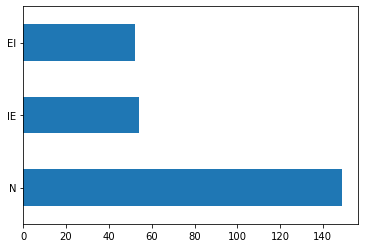

In [45]:
y_test.value_counts().plot(kind = 'barh')

In [46]:
# Get the performance of a dummy classifier
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy='constant',constant='N').fit(X_train, y_train)
print(dc.score(X_train, y_train))
print(dc.score(X_test, y_test))

0.5131175468483816
0.5843137254901961


In [49]:
# Explore the effect of the k parameter
accuracy = []
for k in [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]:
    knc = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    accuracy_test = knc.score(X_test, y_test)
    print('When k='+str(k)+', the accuracy is: '+str(accuracy_test))
    accuracy.append(accuracy_test)

When k=5, the accuracy is: 0.7843137254901961
When k=10, the accuracy is: 0.8156862745098039
When k=50, the accuracy is: 0.8666666666666667
When k=100, the accuracy is: 0.8901960784313725
When k=200, the accuracy is: 0.8862745098039215
When k=500, the accuracy is: 0.9411764705882353
When k=1000, the accuracy is: 0.9568627450980393
When k=1500, the accuracy is: 0.6980392156862745
When k=2000, the accuracy is: 0.5843137254901961


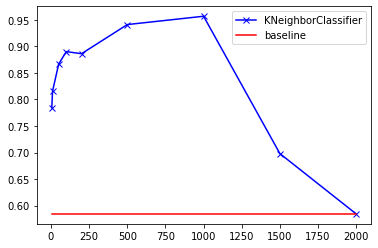

In [57]:
fig, axes = plt.subplots()
k = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]
axes.plot(k, accuracy, 'b-', label='KNeighborClassifier', marker='x')
axes.plot(k, [dc.score(X_test, y_test)]*9, 'r-', label='baseline')
plt.legend()
plt.show()

In [62]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')

[[0.88461538 0.         0.11538462]
 [0.03703704 0.92592593 0.03703704]
 [0.         0.00671141 0.99328859]]


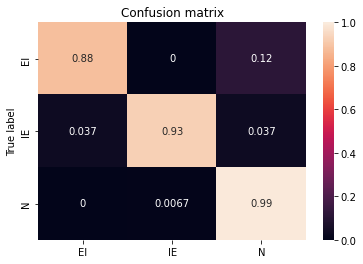

In [70]:
# Use the value of k that gives us the best performance
knc_1000 = KNeighborsClassifier(n_neighbors=1000).fit(X_train, y_train)
y_test_pred = knc_1000.predict(X_test)
cm1 = confusion_matrix(y_test, y_test_pred, normalize='true', labels=['EI', 'IE', 'N'])
print(cm1)
plot_confusion_matrix(cm1, classes=['EI', 'IE', 'N'])

[[0.98076923 0.01923077 0.        ]
 [0.05555556 0.88888889 0.05555556]
 [0.18120805 0.1409396  0.67785235]]


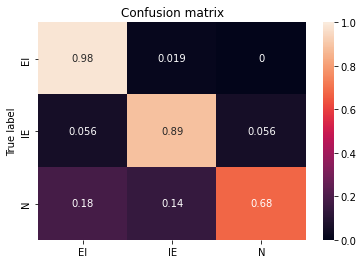

In [71]:
# Compare with k=5
knc_5 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_test_pred = knc_5.predict(X_test)
cm2 = confusion_matrix(y_test, y_test_pred, normalize='true', labels=['EI', 'IE', 'N'])
print(cm2)
plot_confusion_matrix(cm2, classes=['EI', 'IE', 'N'])

### Try another measurement:
Read about the [logarithimic loss](http://scikit-learn.org/0.19/modules/generated/sklearn.metrics.log_loss.html) (or cross-entropy loss). It is often the error metric used when we are trying to optimise classification models.

This metric takes as input the true labels and the estimated probability distributions (bernouli or multinomial). It makes sense to use this metric when we are interested not only in the predicted labels, but also in the confidence with which these labels are predicted.

For instance, think of the situation where you have a single test point and two classifiers. Both classifiers predict the label correctly, however classifier A predicts that the test point belongs to the class with probability 0.55, whereas classifier B predicts the correct class with probability 0.99. Classification accuracy would be the same for the two classifiers (why?) but the `log_loss` metric would indicate that classifier B should be favoured.

In [75]:
logloss = []
for k in [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]:
    knc = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_test_pred = knc.predict_proba(X_test)
    logloss_test = log_loss(y_test, y_test_pred)
    print('When k='+str(k)+', the log loss is: '+str(logloss_test))
    logloss.append(logloss_test)

When k=5, the log loss is: 1.4909193996046313
When k=10, the log loss is: 0.489381019844735
When k=50, the log loss is: 0.5327181300756093
When k=100, the log loss is: 0.5583129505381812
When k=200, the log loss is: 0.6019532892756086
When k=500, the log loss is: 0.6715866647110698
When k=1000, the log loss is: 0.7542935541745395
When k=1500, the log loss is: 0.8177287055931994
When k=2000, the log loss is: 0.8753647883393483


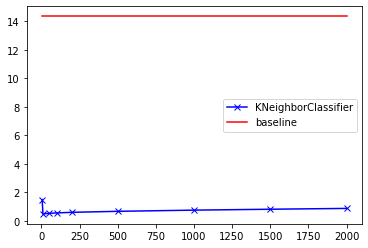

In [77]:
baseline_proba = np.array([[0, 0, 1]]*y_test.shape[0])
fig, axes = plt.subplots()
k = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]
axes.plot(k, logloss, 'b-', label='KNeighborClassifier', marker='x')
axes.plot(k, [log_loss(y_test, baseline_proba)]*9, 'r-', label='baseline')
plt.legend()
plt.show()

N.B. We cannot use the ```log_loss``` metric to evaluate the performance of an SVM classifier. This is simply because the prediction of SVM classifier is not rely on the probabilities. It will not generate probabilities when making predictions.